# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [15]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [17]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [18]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    #data_train = resize_images(data_train,(28,28))
    #data_train = resize_images(data_train,(20,20))
    #data_train = resize_images(data_train,(15,15))
    #data_train = resize_images(data_train,(10,10))
    #data_train = resize_images(data_train,(5,5))
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    #data_test=resize_images(data_test,(28,28))
    #data_test=resize_images(data_test,(20,20))
    #data_test=resize_images(data_test,(15,15))
    #data_test=resize_images(data_test,(10,10))
    #data_test=resize_images(data_test,(5,5))
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

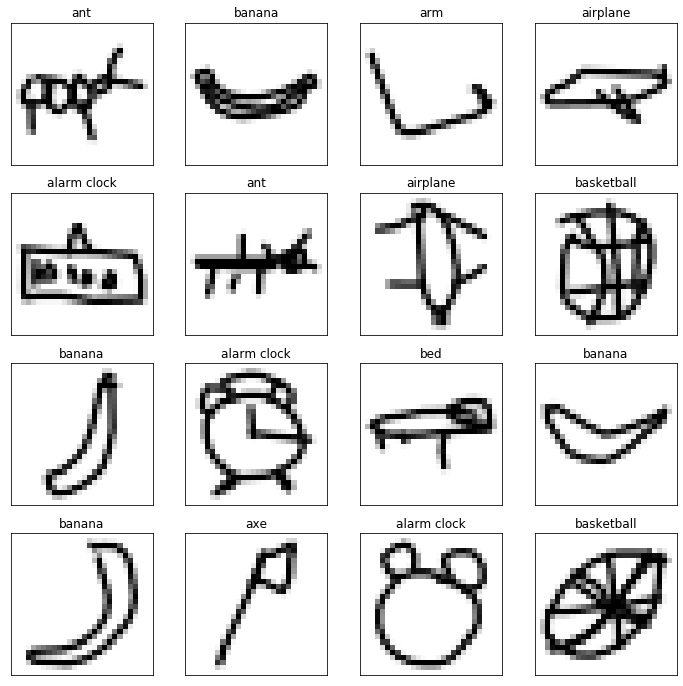

In [19]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [20]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [12]:

#1layer architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 4s 42us/step - loss: 9.8873 - accuracy: 0.3824
Epoch 2/500
100000/100000 [==============================] - 4s 41us/step - loss: 8.4520 - accuracy: 0.4719
Epoch 3/500
100000/100000 [==============================] - 4s 44us/step - loss: 8.0744 - accuracy: 0.4958
Epoch 4/500
100000/100000 [==============================] - 4s 42us/step - loss: 7.8797 - accuracy: 0.5087
Epoch 5/500
100000/100000 [==============================] - 4s 41us/step - loss: 7.6945 - accuracy: 0.5207
Epoch 6/500
100000/100000 [==============================] - 4s 44us/step - loss: 7.5950 - accuracy: 0.5268
Epoch 7/500
100000/100000 [==============================] - 4s 43us/step - loss: 7.5025 - accuracy: 0.5326
Epoch 8/500
100000/100000 [==============================] - 4s 42us/step - loss: 7.4564 - accuracy: 0.5357
Epoch 9/500
100000/100000 [==============================] - 4s 42us/step - loss: 7.4215 - accuracy: 0.5381
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 5s 51us/step - loss: 6.5715 - accuracy: 0.5920
Epoch 148/500
100000/100000 [==============================] - 5s 50us/step - loss: 6.5700 - accuracy: 0.5921
Epoch 149/500
100000/100000 [==============================] - 5s 51us/step - loss: 6.5140 - accuracy: 0.5956
Epoch 150/500
100000/100000 [==============================] - 5s 52us/step - loss: 6.5519 - accuracy: 0.5932
Epoch 151/500
100000/100000 [==============================] - 5s 52us/step - loss: 6.5452 - accuracy: 0.5936
Epoch 152/500
100000/100000 [==============================] - 5s 49us/step - loss: 6.6162 - accuracy: 0.5892
Epoch 153/500
100000/100000 [==============================] - 5s 50us/step - loss: 6.5542 - accuracy: 0.5930
Epoch 154/500
100000/100000 [==============================] - 5s 51us/step - loss: 6.5463 - accuracy: 0.5936 0s - loss: 6.5439 - accuracy
Epoch 155/500
100000/100000 [==============================] - 5s 51us/step - loss: 6.6029 - accuracy: 0.

100000/100000 [==============================] - 5s 52us/step - loss: 6.5052 - accuracy: 0.5962
Epoch 292/500
100000/100000 [==============================] - 5s 52us/step - loss: 6.4847 - accuracy: 0.5975
Epoch 293/500
100000/100000 [==============================] - 5s 50us/step - loss: 6.4372 - accuracy: 0.6004 0s - loss: 6.4377 - accuracy
Epoch 294/500
100000/100000 [==============================] - 5s 55us/step - loss: 6.4298 - accuracy: 0.6009
Epoch 295/500
100000/100000 [==============================] - 5s 53us/step - loss: 6.4569 - accuracy: 0.5993 0s - l
Epoch 296/500
100000/100000 [==============================] - 5s 54us/step - loss: 6.4533 - accuracy: 0.5994
Epoch 297/500
100000/100000 [==============================] - 6s 57us/step - loss: 6.4118 - accuracy: 0.6020
Epoch 298/500
100000/100000 [==============================] - 6s 58us/step - loss: 6.4731 - accuracy: 0.5982
Epoch 299/500
100000/100000 [==============================] - 6s 56us/step - loss: 6.4755 - accur

100000/100000 [==============================] - 5s 53us/step - loss: 6.2679 - accuracy: 0.6110
Epoch 439/500
100000/100000 [==============================] - 5s 51us/step - loss: 6.2975 - accuracy: 0.6091
Epoch 440/500
100000/100000 [==============================] - 5s 52us/step - loss: 6.2823 - accuracy: 0.6101
Epoch 441/500
100000/100000 [==============================] - 5s 52us/step - loss: 6.3383 - accuracy: 0.6066
Epoch 442/500
100000/100000 [==============================] - 5s 51us/step - loss: 6.2690 - accuracy: 0.6109
Epoch 443/500
100000/100000 [==============================] - 5s 51us/step - loss: 6.2781 - accuracy: 0.6103
Epoch 444/500
100000/100000 [==============================] - 5s 53us/step - loss: 6.2756 - accuracy: 0.6105
Epoch 445/500
100000/100000 [==============================] - 5s 51us/step - loss: 6.2939 - accuracy: 0.6093
Epoch 446/500
100000/100000 [==============================] - 5s 51us/step - loss: 6.3305 - accuracy: 0.6071
Epoch 447/500
100000/100

In [ ]:
'''
#2layer architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
'''

In [ ]:
'''
#3layer architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
'''

In [ ]:
'''
#5layer architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
'''

In [13]:
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.5968


In [28]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')